# MVP Análise de Dados e Boas Práticas
Nome: Carlos Leonardo Souza Cardoso

Matrícula: 4052025000555

Dataset: [Weather Type Classification](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

# Descrição do Problema
O conjunto de dados foi gerado sinteticamente para simular dados meteorológicos em tarefas de classificação. Inclui diversas características relacionadas ao clima e o categoriza em quatro tipos: Chuvoso, Ensolarado, Nublado e Nevado. Este conjunto de dados foi desenvolvido para a prática de algoritmos de classificação, pré-processamento de dados e métodos de detecção de outliers.

# Hipóteses do Problema

- Entender quais variáveis podem ser mais importantes para categorizar o tipo de clima
- Qual modelos pode apresentarmelhor acertividade
- Checar se os dados são bons o suficiente para essa classificação

# Tipo de Problema
Análise exploratória dos dados de chuva, entender a correlação entre as variáveis, verificar o balanceamento da variável alvo. Pelo tipo de dados serão aplicados algoritmos de aprendizado supervisionados.
- Random Forest
- Gradient Boosting Classifier
- Support Vector Machine


# Seleção de Dados
Dataset Kaggle para classificação de dados climáticos.

# Atributos do dataset
- Temperatura (numérico): A temperatura em graus Celsius, variando de frio extremo a calor extremo.
- Umidade (numérico): A porcentagem de umidade, incluindo valores acima de 100% para introduzir valores discrepantes.
- Velocidade do Vento (numérico): A velocidade do vento em quilômetros por hora, com uma faixa que inclui valores irrealisticamente altos.
- Precipitação (%) (numérico): A porcentagem de precipitação, incluindo valores discrepantes.
- Nebulosidade (categórica): A descrição da nebulosidade.
- Pressão Atmosférica (numérico): A pressão atmosférica em hPa, cobrindo uma ampla faixa.
- Índice UV (numérico): O índice UV, que indica a intensidade da radiação ultravioleta.
- Estação do Ano (categórico): A estação do ano durante a qual os dados foram registrados.
- Visibilidade (km) (numérico): A visibilidade em quilômetros, incluindo valores muito baixos ou muito altos.
- Localização (categórica): O tipo de local onde os dados foram registrados.
- Tipo de Clima (categórico): A variável alvo para classificação, indicando o tipo de clima.

## Fazer Download do dataset

Esse processo vem simplificar o download do dataset no colab e descompactar no diretório do ambiente em que ocorrerão as execuções.
- O ! é usado para fazer chamadas ao Sistema Operaciona, que nesse caso é uma distribuição baseada em Linux.

In [1]:
!curl -L -o weather-type-classification.zip\
    https://www.kaggle.com/api/v1/datasets/download/nikhil7280/weather-type-classification
!unzip -u weather-type-classification.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  186k  100  186k    0     0   166k      0  0:00:01  0:00:01 --:--:--  360k
Archive:  weather-type-classification.zip


## Importação das Bibliotecas

- pandas, matplotlib, seaborn, numpy: manipulação e visualização dos dados.

- sklearn.ensemble: Random Forest e Gradient Boosting.

- sklearn.model_selection: divisão treino/teste.

- sklearn.svm: Support Vector Machine.

- sklearn.metrics: métricas como accuracy, precision, recall, f1-score.

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score



2025-07-06 18:53:34.000801: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 18:53:34.007244: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751838814.014219  250590 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751838814.016468  250590 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751838814.022285  250590 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
# Configurações do pandas para exibir todos os dados
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas
pd.set_option('display.max_rows', None)     # Mostrar todas as linhas


In [4]:
# Ler aquivo CSV
dataset = pd.read_csv('weather_classification_data.csv')

## Entender um pouco do dataset

In [5]:
# Exibir informações do dataset
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
None


Com essa informação inicial, idendificamos que o dataset possui 11 colunas, 13200 registros com colunas de dados float, int e object.
As identificadas como objetos, deveremos analisar para entender o que são. Mas uma coisa importante é saber se os dados tem o dicionário. Nesse caso ele possui, como segue:



Também não há valores nulos, mas vamos confirmar isso.

In [6]:
# checar valores nulos
print(dataset.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Com essa checagem simples da função do Pandas para identificar valores nulos e depois somar, vemos que de fato não existem valores nulos em nenhuma das colunas.

In [7]:
# Exibir as primeiras linhas do dataset
print(dataset.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


In [8]:
# Exibir estatísticas descritivas do dataset
print(dataset.describe())


        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

### Uma análise inicial sobre os dados

Com os dados estaticos descritivos, temos uma visão geral das colunas, como:

- Temperatura pussui valores negativos, o que é esperado, pois a temperatura pode ser negativa em regiões frias. Mas a média é positiva, o que indica que a maioria dos dados está acima de zero. O que chama mais a atenção é a máxima com 109 graus Celsius, o que é um valor muito alto e indica um erro.

- Umidade por sua vez conta com dados entre 20% e 109%, indicando mais uma vez que possuem valores fora do padrão, tendo em vista que a umidade máxima é de 100%, mas na descrição do dataset já existia essa informação sobre valores maiores que o real.

- Velocidade do vento possui valores entre 0 e 48.5 km/h, nas informações do dataset informa que possuem dados irrealisticos, mas 48.5 km/h não é algo fora do comum, mas devemos ficar atentos se em algum cenario isso pod não fazer sentido, diante das outras variáveis.

- A precipitação possui valores entre 0 e 109, como são valores de porcentagem, valores acima de 100% não são reais. Também devemos analisar esse caso.

- Pressão atmosférica também possui valor de máima de 1199 hPa, e revendo a literatura sobre valores de pressão, sendo a média ao nível do mar próximos a 1000hPa.

- Valores de UV estão entre 0 e 14, dentro dos limites, sendo a máxima do índice 18.

- Visibilidade podem ter vários fatores atrelados, como a chuva, nevoeiro e particulas que podem interferir. Valores vão de 0Km até 20Km.

In [9]:
# Exibir valores únicos em cada coluna
print(dataset.nunique())


Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64


Com as informações acima, vamos fazer:
- Dados de pressão atmosférica com muitos dados únicos, tendo uma necessidade de criar uma nova coluna, classificando em baixa, média e alta pressão atmosférica.
    - Altitude e pressão estão correlacionadas?
        - Em pesquisa rápida sabemos que sim, conforme altitude aumenta, a pressão atmosférica diminui. O que nos resta saber é se é possível correlacionar nesse dataset.
- Identificar as localizações
- Identificar se há necessidade de criar coluna para classificar
    - precipitação
    - vento
    - umidade
    - temperatura

### Distribuição dos dados numéricos

Para analisarmos melhor a distribuição dos dados numéricos das variáveis do dataset, vamos ver os gráficos de cada um para tentarmos identificar possíveis problemas.

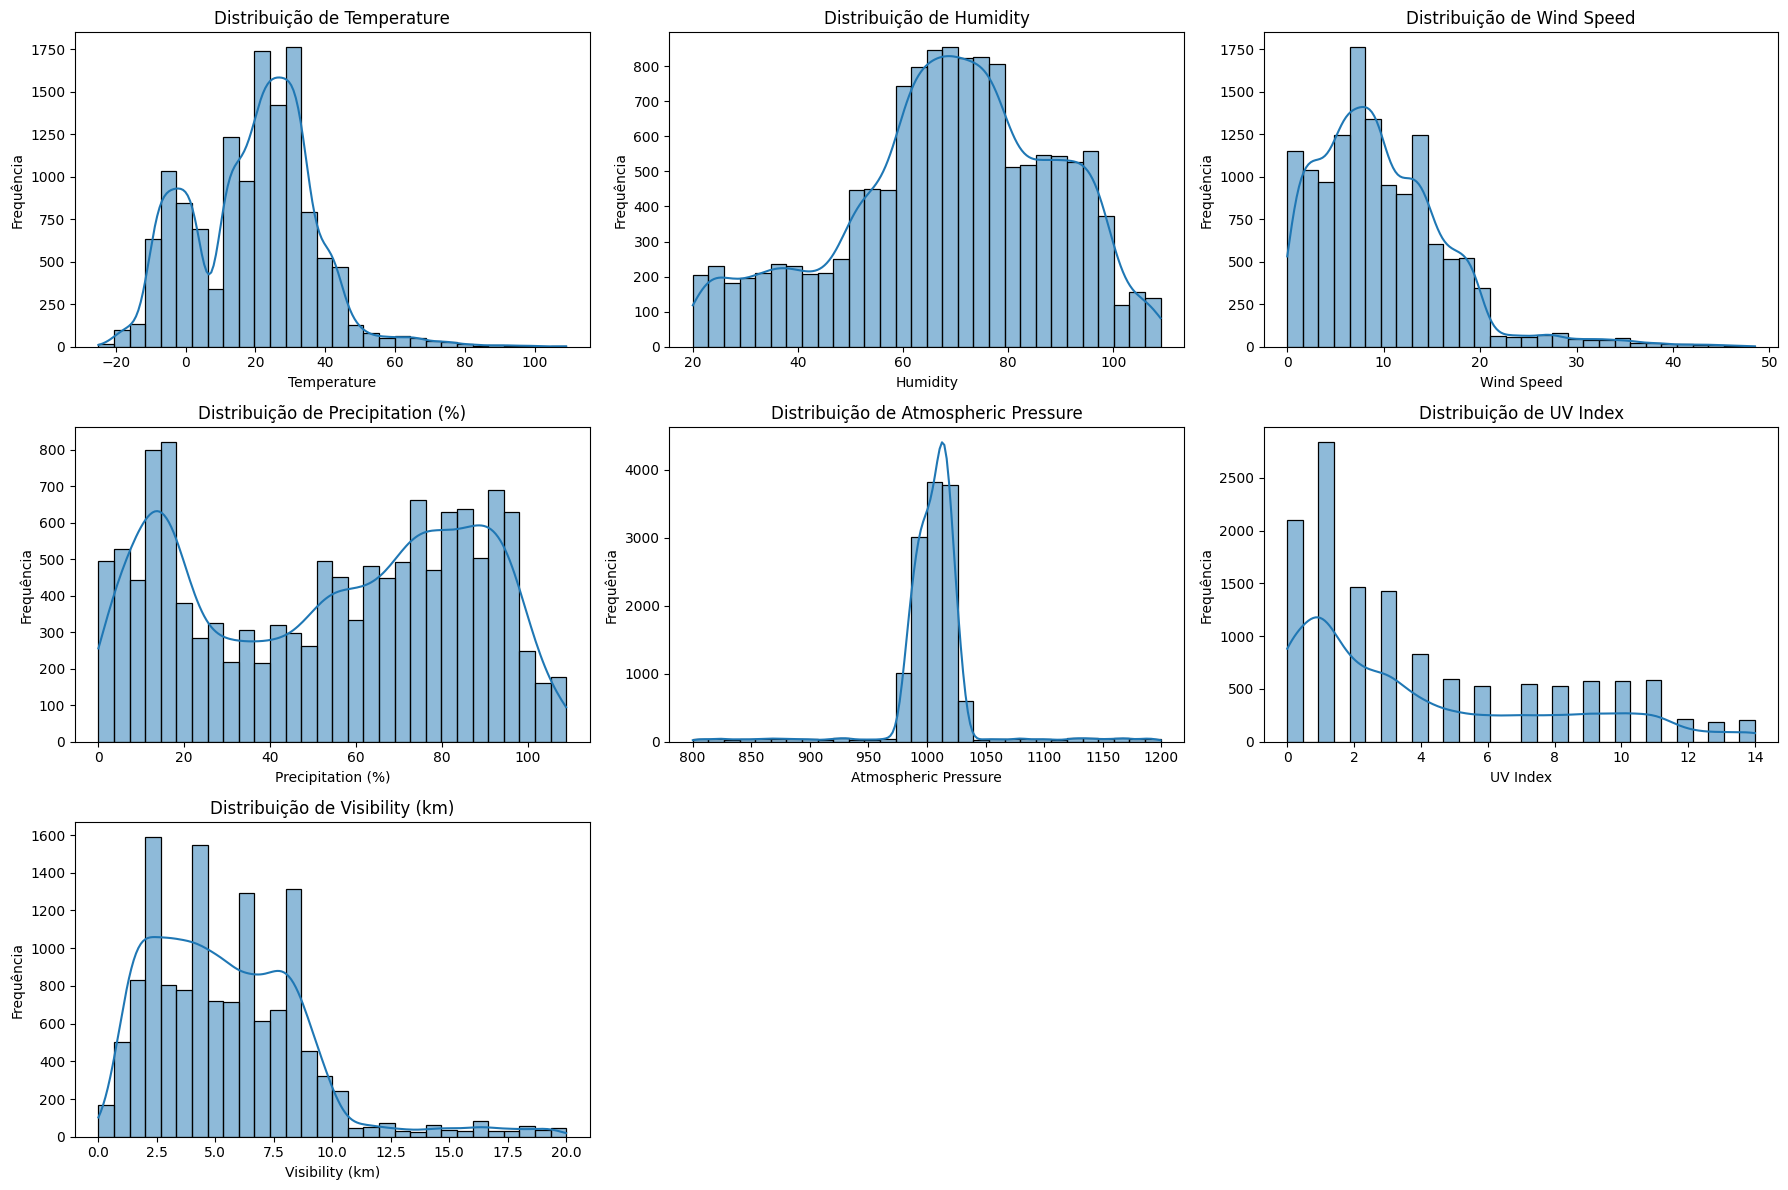

In [10]:
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Então temos:
- Temperatura existem alguns poucos registros bem acima do que esperamos
- Umidade com qua quantidade maior que os 100%
- Precipitação com uma pequena quantidade acima dos 100%

### Dados categóricos

Ainda não temos informações sobre os dados categóricos. Como vimos acima, eles possuem poucos registros únicos. Vamos entende-los.

In [11]:
# checar os dados categóricos
categorical_columns = dataset.select_dtypes(include=['object']).columns
print("Colunas categóricas:", categorical_columns)

# Exibir valores únicos para cada coluna categórica
for column in categorical_columns:
    print(f"Valores únicos em '{column}': {dataset[column].unique()}")
    print(f"Número de valores únicos em '{column}': {dataset[column].nunique()}\n")

Colunas categóricas: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
Valores únicos em 'Cloud Cover': ['partly cloudy' 'clear' 'overcast' 'cloudy']
Número de valores únicos em 'Cloud Cover': 4

Valores únicos em 'Season': ['Winter' 'Spring' 'Summer' 'Autumn']
Número de valores únicos em 'Season': 4

Valores únicos em 'Location': ['inland' 'mountain' 'coastal']
Número de valores únicos em 'Location': 3

Valores únicos em 'Weather Type': ['Rainy' 'Cloudy' 'Sunny' 'Snowy']
Número de valores únicos em 'Weather Type': 4



Contagem de registros para cada categoria em 'Cloud Cover':
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Contagem de registros para cada categoria em 'Season':
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Contagem de registros para cada categoria em 'Location':
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Contagem de registros para cada categoria em 'Weather Type':
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64



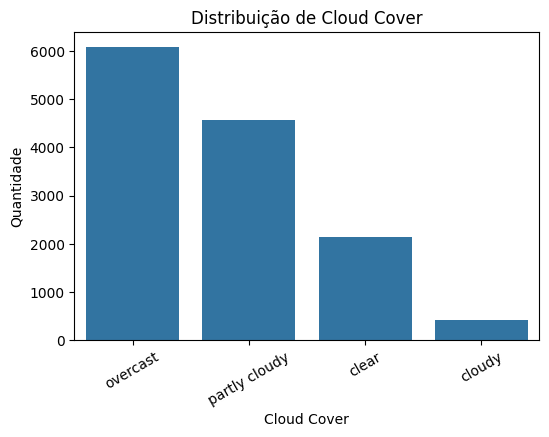

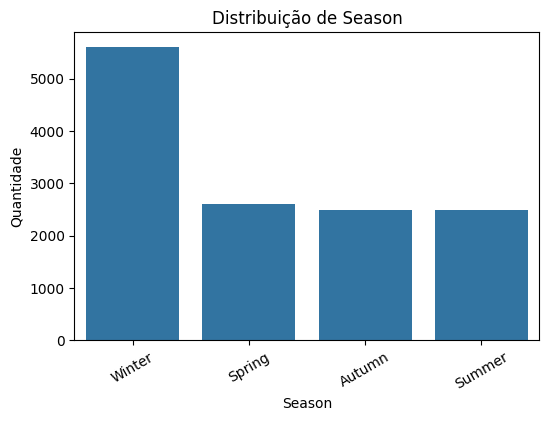

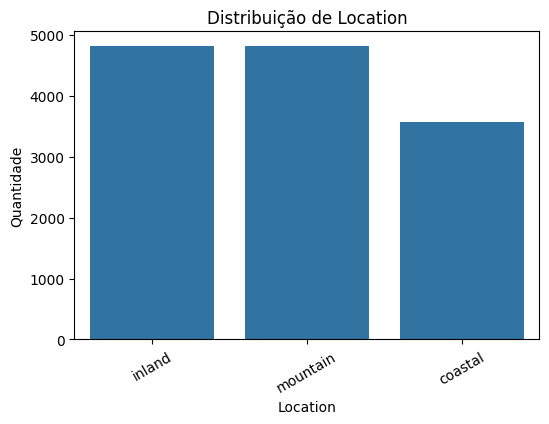

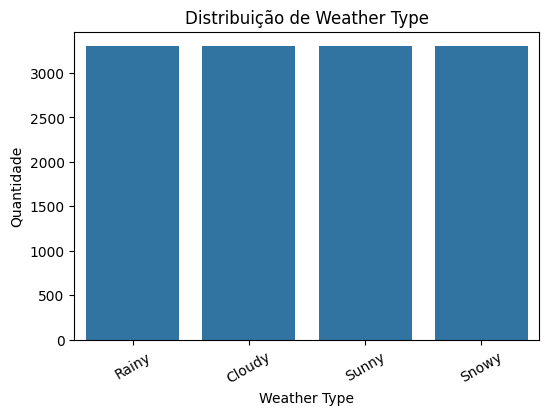

In [12]:
# Checar a quantidade de dados em cada grupo categórico selecionado
categorical_groups = ['Cloud Cover', 'Season', 'Location', 'Weather Type']
for column in categorical_groups:
    print(f"Contagem de registros para cada categoria em '{column}':")
    print(dataset[column].value_counts())
    print()

for column in categorical_groups:
    counts = dataset[column].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=counts.index, y=counts.values)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Quantidade")
    plt.xticks(rotation=30)
    plt.show()


Agora sabemos que:
- Nebulosidade são:
    - Parcialmente nublado
    - Limpo
    - "Nuvens pesadas"
    - Nublado

- Estações
    - Verão
    - Outono
    - Inverno
    - Primavera

- Local
    - Interior
    - Costa
    - Montanhas

- Tipo de clima
    - Chuvoso
    - Nublado
    - Ensolarado
    - Nevado

Nosso target que é o "Tipo de clima" está balanceado. Então não vamos precisar trabalhar nessa variável. Mas as demais variáveis possuem desbalanceamento.
- Nebulosidade
    - Há uma diferença muito grande entre todos os atributos.
- Estações
    - A quantidade de dados de invero é muito superior aos demais.
- Local
    - Área costeira possuem menos dados, mas nada muito discrepante

## Pré processamento e mais análise sobre os dados

### Pressão Atmosférica

Voltando sobre a correlação entre a variável pressão e altitude pode ficar dificil fazer uma correlação, tendo em vista que não temos valores aproximados de altitude em metros por exemplo, mas talvez ainda seja possível vermos diferenças entre as pressões atmosféricas entre essas três localidades. 

Média da Pressão Atmosférica por Localização:
Location
coastal     1010.890865
inland      1004.536742
mountain    1003.363391
Name: Atmospheric Pressure, dtype: float64


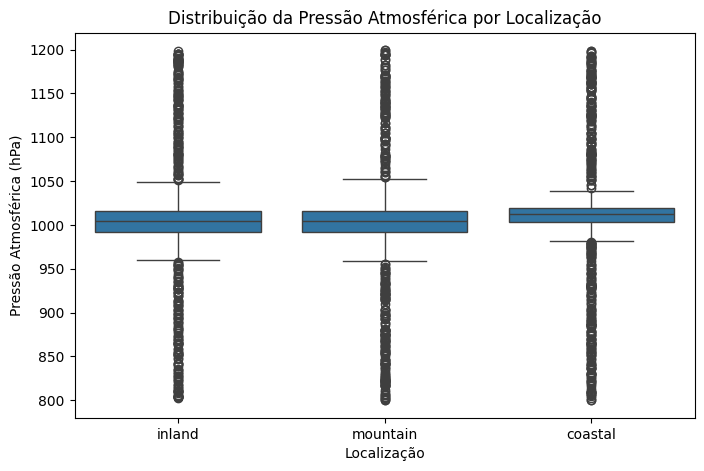

In [13]:
# Calcular a média da pressão atmosférica para cada localização
mean_pressure_by_location = dataset.groupby("Location")["Atmospheric Pressure"].mean()
print("Média da Pressão Atmosférica por Localização:")
print(mean_pressure_by_location)

# Visualizar a distribuição da pressão atmosférica por localização
plt.figure(figsize=(8, 5))
sns.boxplot(x="Location", y="Atmospheric Pressure", data=dataset)
plt.title("Distribuição da Pressão Atmosférica por Localização")
plt.ylabel("Pressão Atmosférica (hPa)")
plt.xlabel("Localização")
plt.show()

#### Criar função para corrigir outliers

In [14]:
def corrigir_outliers_regressao(df, coluna_alvo, limite_inferior=None, limite_superior=None, colunas_categoricas=None):
    """
    Corrige outliers em uma coluna numérica usando RandomForestRegressor.
    Parâmetros:
        df: DataFrame original
        coluna_alvo: coluna a ser corrigida
        limite_inferior: valor mínimo aceitável (None para ignorar)
        limite_superior: valor máximo aceitável (None para ignorar)
        colunas_categoricas: lista de colunas categóricas para codificação
    Retorna:
        df com coluna corrigida
    """
    outliers = pd.Series([False] * len(df))
    if limite_inferior is not None:
        outliers |= df[coluna_alvo] < limite_inferior
    if limite_superior is not None:
        outliers |= df[coluna_alvo] > limite_superior

    if colunas_categoricas:
        df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)
    else:
        df_encoded = df.copy()

    X = df_encoded.drop(columns=[coluna_alvo])
    y = df_encoded[coluna_alvo]

    model = RandomForestRegressor()
    model.fit(X[~outliers], y[~outliers])
    pred = model.predict(X[outliers])
    df.loc[outliers, coluna_alvo] = pred
    print(f"Corrigidos {outliers.sum()} valores em '{coluna_alvo}' fora dos limites [{limite_inferior}, {limite_superior}].")
    return df


Com esses dados identificamos que a região costeira tem uma pressão atmosférica média mais alta, enquanto as regiões montanhosas e interior tem uma média mais baixa. Isso pode ser devido à diferença de altitude e proximidade do mar, que afeta a pressão atmosférica.

Mesmo assim, verificando registros reais, sobre pressão atmosférica, há um problema com relação aos dados. Os registros de maior alta de pressão foi de 1084 hPa, e a menor registrada foi de 870 hPa. Então precisamos corrigir esses valores acima de 1084 e menores de 870.



In [15]:
dataset = corrigir_outliers_regressao(
    dataset,
    coluna_alvo='Atmospheric Pressure',
    limite_inferior=870,
    limite_superior=1084,
    colunas_categoricas=['Season', 'Location', 'Cloud Cover', 'Weather Type']
)

Corrigidos 565 valores em 'Atmospheric Pressure' fora dos limites [870, 1084].


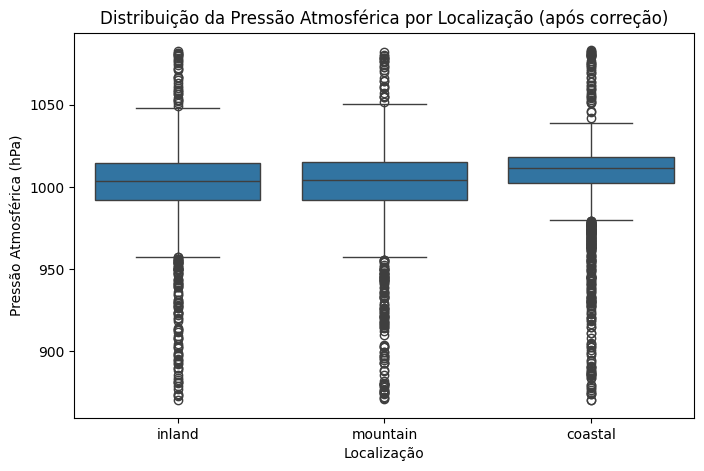

In [16]:
# Agora vamos verificar novamente a distribuição da pressão atmosférica
plt.figure(figsize=(8, 5))
sns.boxplot(x="Location", y="Atmospheric Pressure", data=dataset)
plt.title("Distribuição da Pressão Atmosférica por Localização (após correção)")
plt.ylabel("Pressão Atmosférica (hPa)")
plt.xlabel("Localização")
plt.show()

Agora temos uma melhora significativa nos dados com relação a pressão atmosférica. Talvez ainda existam erros matemáticos e estatísticos sobre essa variável, mas sabermos que dados abaixo ou acima dos já registrados nos garantem dados menos ruidosos para o nosso modelo.

Antes de prosseguirmos, vamos limpar nosso dataset removendo os dados que estão com problemas que já identificamos anteriormente, que foram:
- Valores de porcentagem acima de 100%
    - Precipitação
    - Umidade
- Valor de temperatura muito alta, como no caso de 109 graus Celsius

### Temperatura

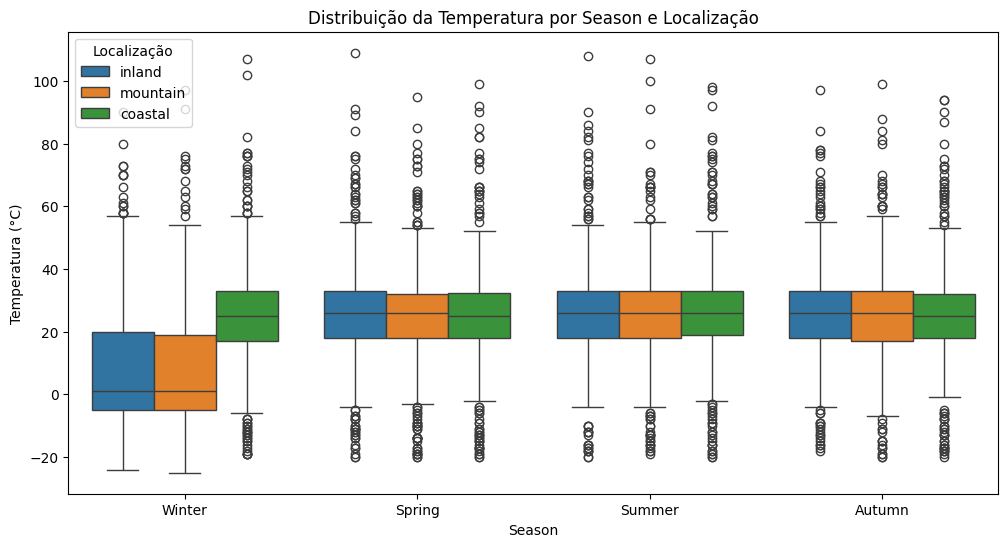

In [17]:
# Checar temperaturas por Season e localização
plt.figure(figsize=(12, 6))
sns.boxplot(x="Season", y="Temperature", hue="Location", data=dataset)
plt.title("Distribuição da Temperatura por Season e Localização")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Season")
plt.legend(title="Localização")
plt.show()

Imprimindo esse gráfico confirmamos muitos outliers em todas as localidades, pontos acima de 60 graus e inclusive acima de 100 graus.
A região costeira mostra maior variação e mais outliers negativos, possivelmente indicando erros de medição ou anomalias.
Antes apenas estavamos procurando temperaturas altas, mas agora também podem ter anomalias de temperaturas baixas. Principalmente fora do inverno.

In [18]:
# Checar temperatura acima de 60 graus Celsius, conta quantos valores estão acima desse limite
high_temp_count = (dataset["Temperature"] > 60).sum()
print(f"Número de registros com temperatura acima de 60 graus Celsius: {high_temp_count}")

Número de registros com temperatura acima de 60 graus Celsius: 207


In [19]:
# Checar temperatura abaixo de -15 graus Celsius, conta quantos valores estão abaixo desse limite
low_temp_count = (dataset["Temperature"] < -15).sum()
print(f"Número de registros com temperatura abaixo de -15 graus Celsius: {low_temp_count}")

Número de registros com temperatura abaixo de -15 graus Celsius: 140


In [20]:
dataset = corrigir_outliers_regressao(
    dataset,
    coluna_alvo='Temperature',
    limite_inferior=-15,
    limite_superior=60,
    colunas_categoricas=['Season', 'Location', 'Cloud Cover', 'Weather Type']
)

Corrigidos 347 valores em 'Temperature' fora dos limites [-15, 60].


In [21]:
# Checa temperatura acima de 60 graus Celsius novamente
high_temp_count = (dataset["Temperature"] > 60).sum()
print(f"Número de registros com temperatura acima de 60 graus Celsius após normalização: { high_temp_count}")

# Checa temperatura abaixo de -5 graus Celsius novamente
low_temp_count = (dataset["Temperature"] < -15).sum()
print(f"Número de registros com temperatura abaixo de -15 graus Celsius após normalização: {low_temp_count}")

Número de registros com temperatura acima de 60 graus Celsius após normalização: 0
Número de registros com temperatura abaixo de -15 graus Celsius após normalização: 0


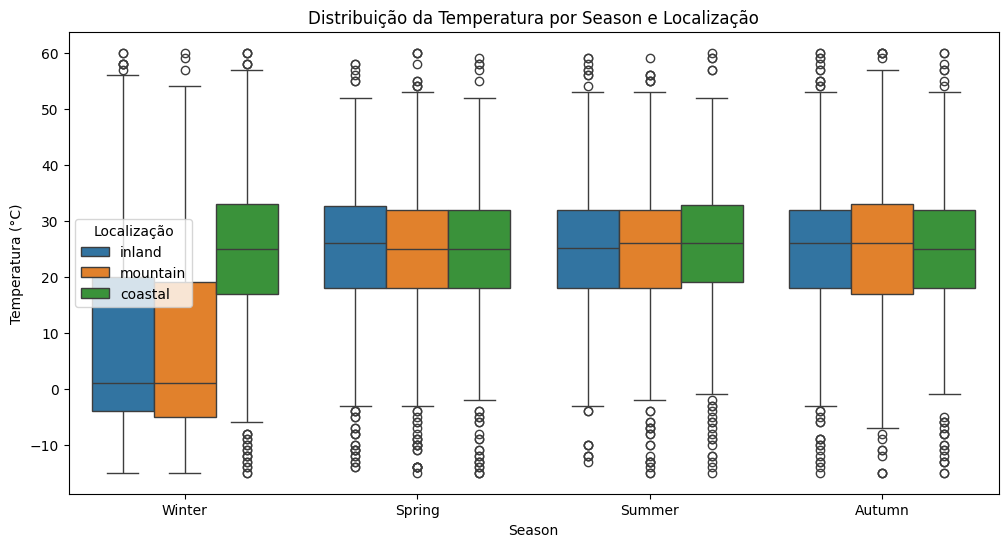

In [22]:
# Checar temperaturas por Season e localização
plt.figure(figsize=(12, 6))
sns.boxplot(x="Season", y="Temperature", hue="Location", data=dataset)
plt.title("Distribuição da Temperatura por Season e Localização")
plt.ylabel("Temperatura (°C)")
plt.xlabel("Season")
plt.legend(title="Localização")
plt.show()

### Precipitação e umidade

Assim como na temperatura, a precipitação e umidade possuem valores acima de uma situação real. Nesses dois casos são valores acima de 100%.

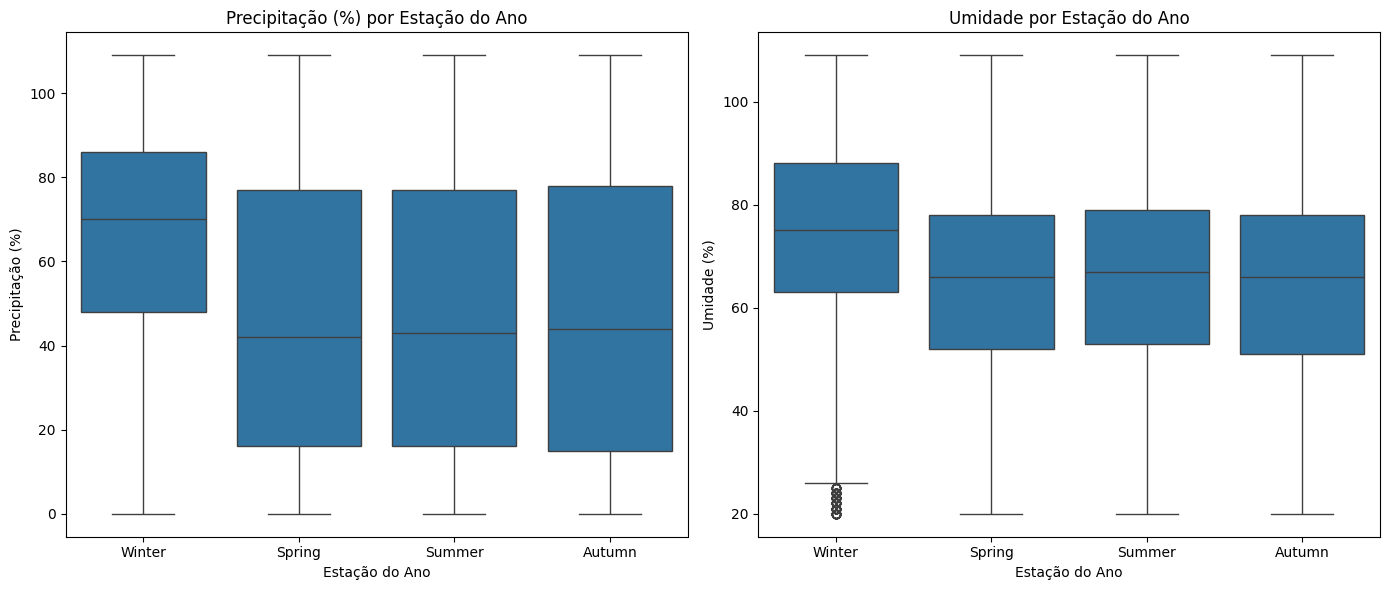

In [23]:
# Gráfico de Precipitação (%) e Umidade por Estação do Ano
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='Precipitation (%)', data=dataset)
plt.title('Precipitação (%) por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Precipitação (%)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='Humidity', data=dataset)
plt.title('Umidade por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Umidade (%)')

plt.tight_layout()
plt.show()

Então confirmamos esses valores em todos os cenários, vamos corrigi-los.

In [24]:
dataset = corrigir_outliers_regressao(
    dataset,
    coluna_alvo='Precipitation (%)',
    limite_superior=100,
    colunas_categoricas=['Season', 'Location', 'Cloud Cover', 'Weather Type']
)


dataset = corrigir_outliers_regressao(
    dataset,
    coluna_alvo='Humidity',
    limite_superior=100,
    colunas_categoricas=['Season', 'Location', 'Cloud Cover', 'Weather Type']
)

Corrigidos 392 valores em 'Precipitation (%)' fora dos limites [None, 100].
Corrigidos 416 valores em 'Humidity' fora dos limites [None, 100].


/tmp/ipykernel_250590/1190499064.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[77.22 86.8  79.74 83.44 82.51 82.02 84.67 82.24 85.88 82.47 87.22 86.61
 86.38 85.83 84.76 74.39 83.34 78.95 79.86 86.11 81.36 90.84 80.73 84.84
 83.53 87.12 87.85 77.8  82.24 83.93 80.47 71.45 86.24 85.45 83.91 84.1
 86.99 88.34 83.1  81.32 88.17 84.02 86.3  83.26 90.6  86.91 83.9  85.25
 90.01 82.53 83.23 85.83 82.64 87.   88.37 82.99 82.63 86.24 79.75 87.8
 84.63 84.48 84.55 83.75 83.81 83.77 85.47 81.56 83.67 87.31 87.09 87.09
 84.   86.18 87.86 88.02 84.27 80.11 80.89 87.24 83.23 84.18 81.72 83.69
 87.45 80.17 88.59 82.33 75.95 82.05 84.3  80.22 87.14 86.27 87.6  84.8
 81.98 78.21 83.44 74.8  77.38 78.61 85.12 83.78 87.95 81.94 88.47 83.12
 82.34 75.14 83.01 83.66 77.27 86.6  86.86 86.62 87.87 84.29 83.75 76.33
 87.33 87.49 84.99 81.95 82.17 87.79 80.5  81.18 85.72 81.81 84.86 78.43
 85.98 82.36 83.32 79.52 80.77 

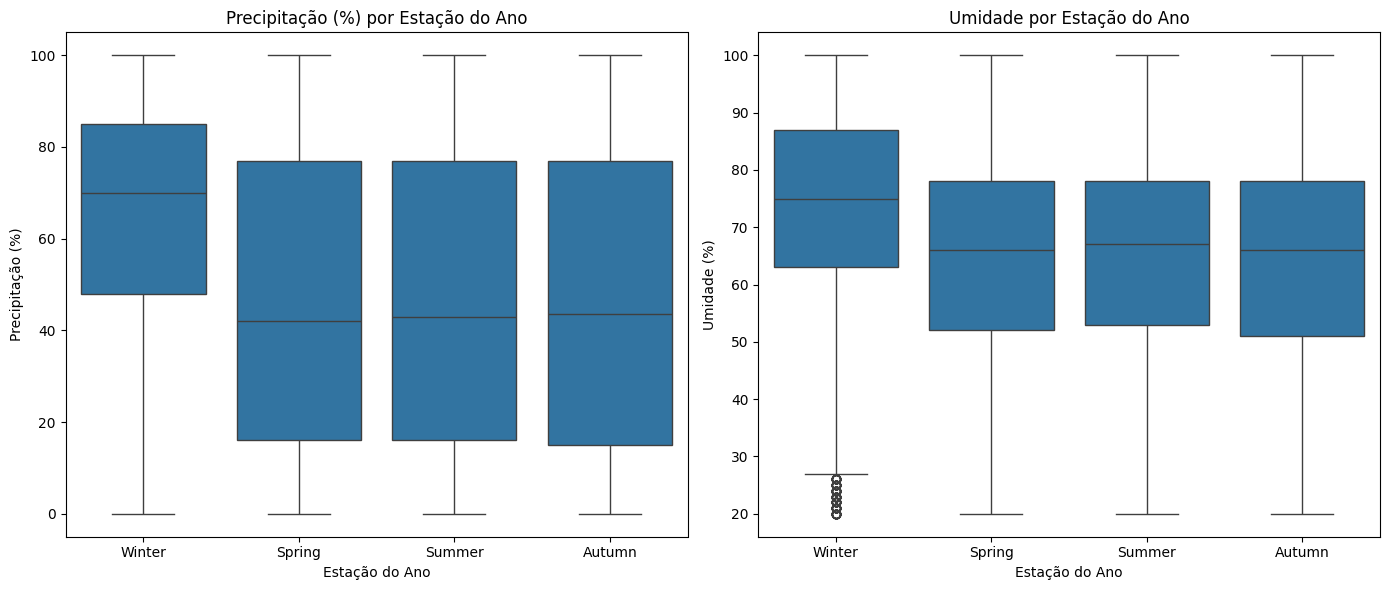

In [25]:
# Gráfico de Precipitação (%) e Umidade por Estação do Ano
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Season', y='Precipitation (%)', data=dataset)
plt.title('Precipitação (%) por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Precipitação (%)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Season', y='Humidity', data=dataset)
plt.title('Umidade por Estação do Ano')
plt.xlabel('Estação do Ano')
plt.ylabel('Umidade (%)')

plt.tight_layout()
plt.show()

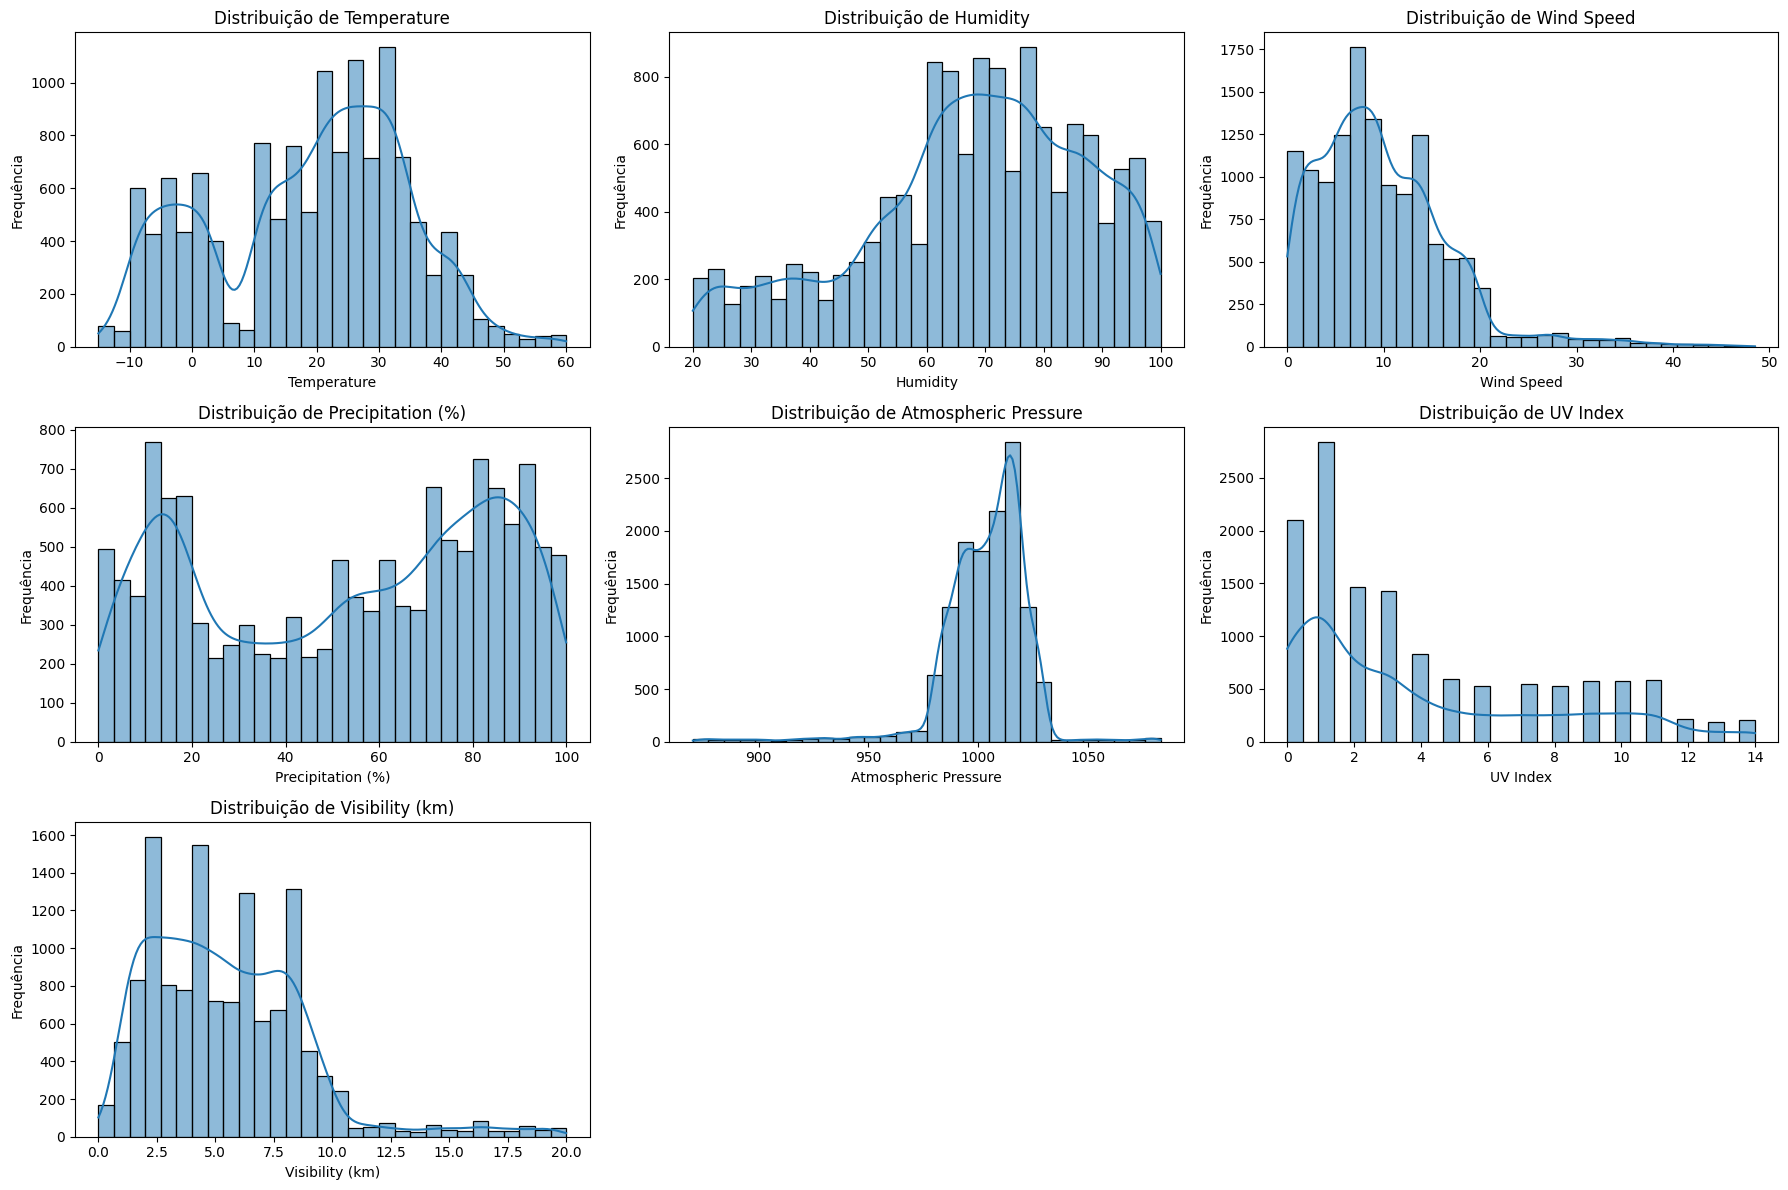

In [26]:
# Gráficos de distribuição para cada variável numérica do dataset
numeric_columns = dataset.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

Os gráficos de distribuição das variáveis numéricas após o tratamento de outliers mostram uma redução significativa de valores extremos e inconsistentes. As distribuições agora apresentam formatos mais condizentes com o esperado para dados meteorológicos, sem picos anômalos ou caudas longas causadas por registros irreais. Isso indica que o pré-processamento foi eficaz em tornar o dataset mais limpo e adequado para análise e modelagem. Com menos ruído, os modelos de machine learning tendem a aprender padrões mais reais, o que deve se refletir em melhores métricas de desempenho e maior confiabilidade dos resultados. Além disso, a visualização das distribuições facilita a identificação de possíveis tendências ou agrupamentos naturais nos dados, contribuindo para uma análise exploratória mais robusta.

### Variável alvo

Nós já sabemos que nossa variável alvo é distribuida de forma uniforme, contendo 3300 registros em cada.

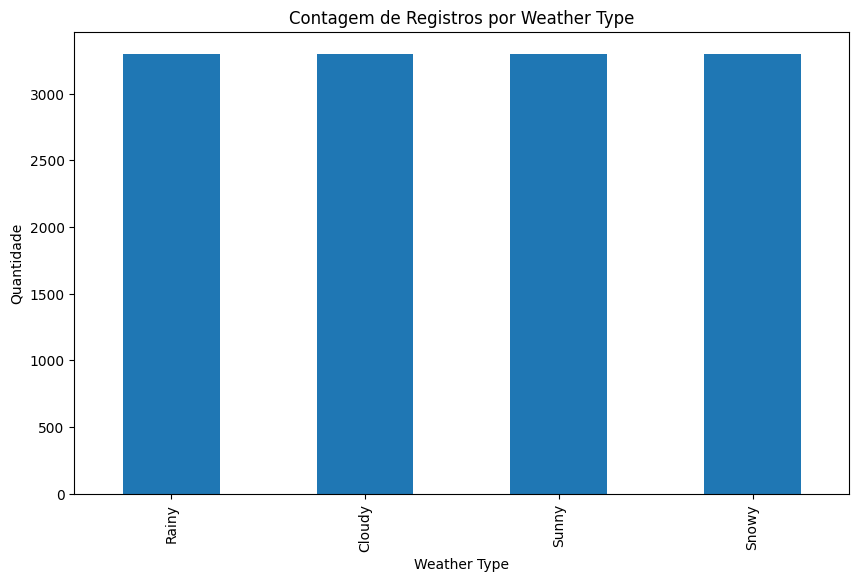

In [27]:
dataset["Weather Type"].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Contagem de Registros por Weather Type")
plt.xlabel("Weather Type")
plt.ylabel("Quantidade")
plt.show()

In [28]:
# Calcular as médias das variáveis numéricas agrupadas por Weather Type
mean_by_weather_type = dataset.groupby('Weather Type')[numeric_columns].mean()
print(mean_by_weather_type)

              Temperature   Humidity  Wind Speed  Precipitation (%)  \
Weather Type                                                          
Cloudy          22.755039  65.784176    8.601818          39.593261   
Rainy           22.493864  77.766388   13.677576          74.045830   
Snowy           -1.124152  77.868236   10.976212          74.003436   
Sunny           31.096100  50.717042    6.073182          24.372736   

              Atmospheric Pressure  UV Index  Visibility (km)  
Weather Type                                                   
Cloudy                 1007.225548  3.583939         7.071212  
Rainy                  1002.741575  2.684242         3.628485  
Snowy                   988.942989  1.950303         3.591515  
Sunny                  1015.695238  7.804545         7.560455  


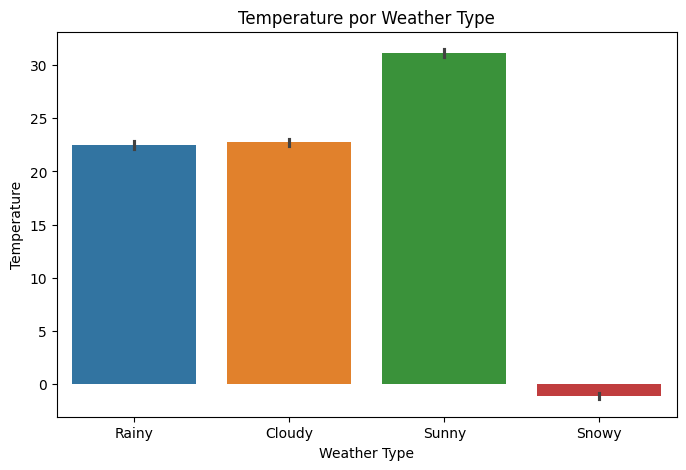

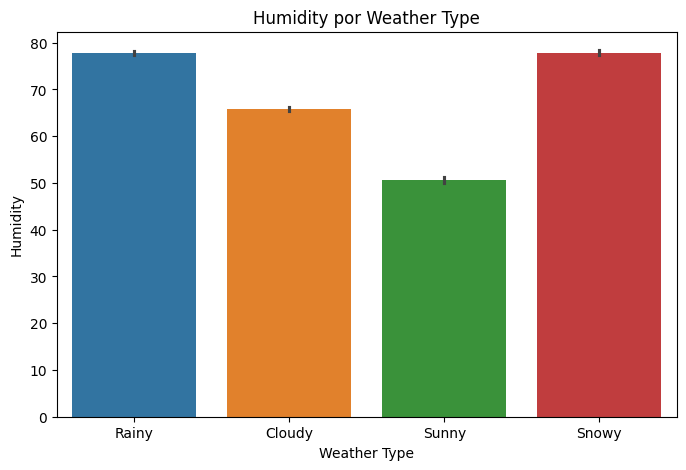

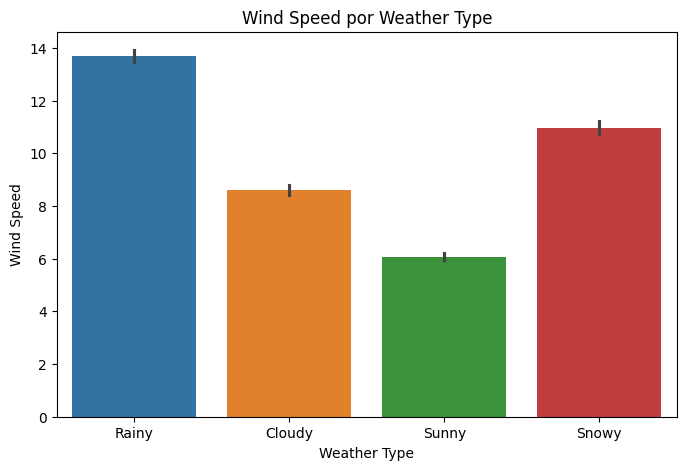

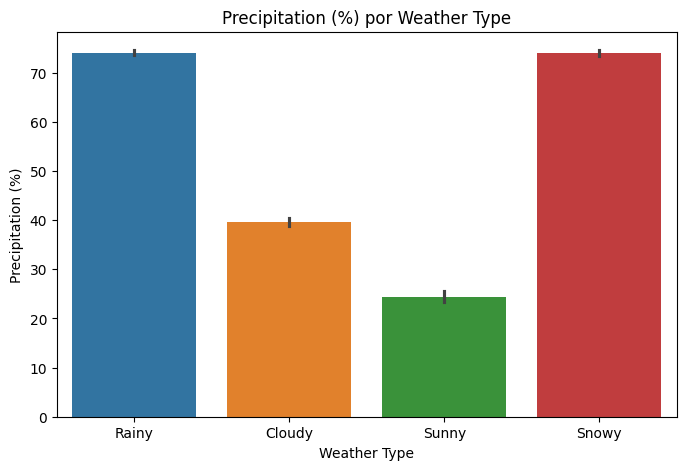

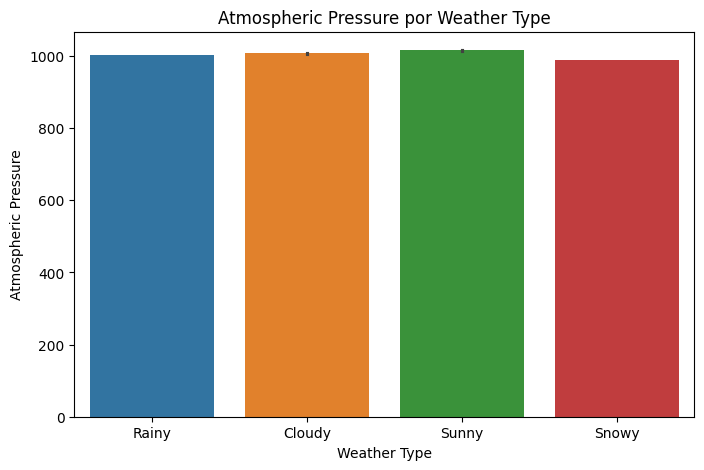

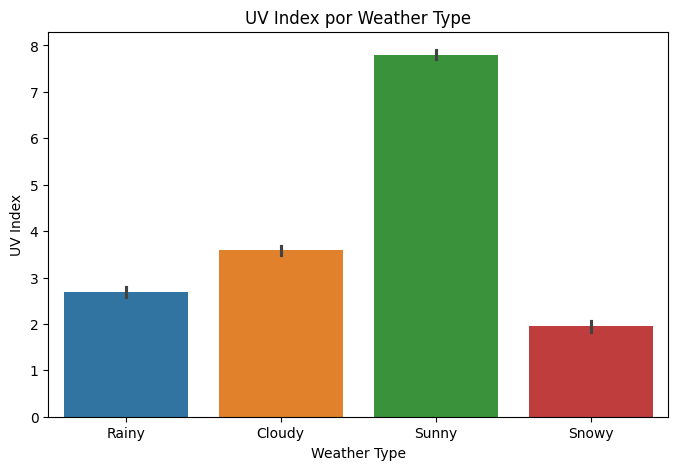

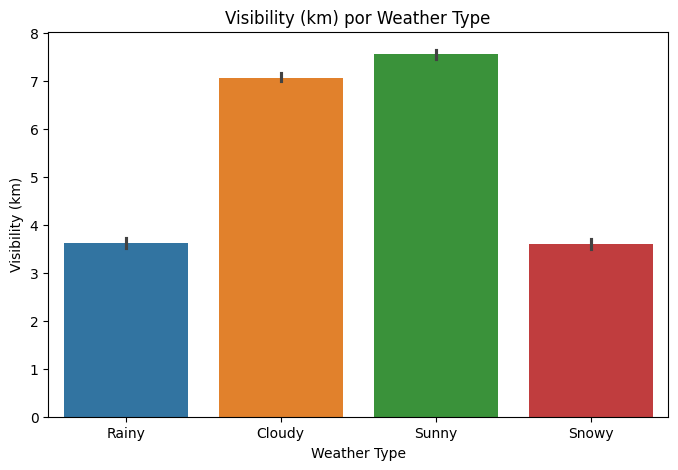

In [29]:
# Gráficos de boxplot para cada variável numérica em relação à variável alvo (Weather Type)
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Weather Type', y=col, data=dataset, hue='Weather Type')
    plt.title(f'{col} por Weather Type')
    plt.xlabel('Weather Type')
    plt.ylabel(col)
    plt.show()

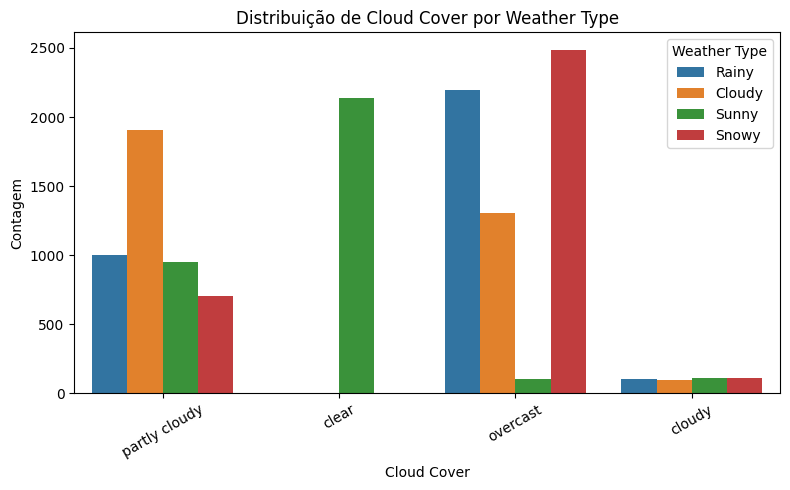

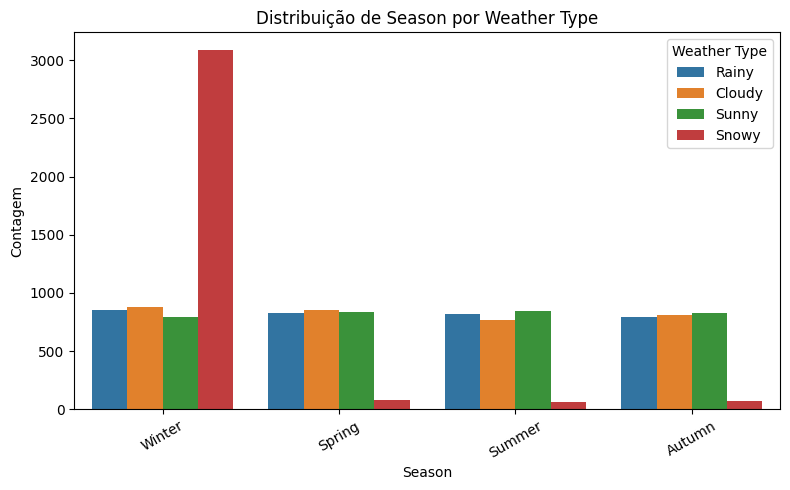

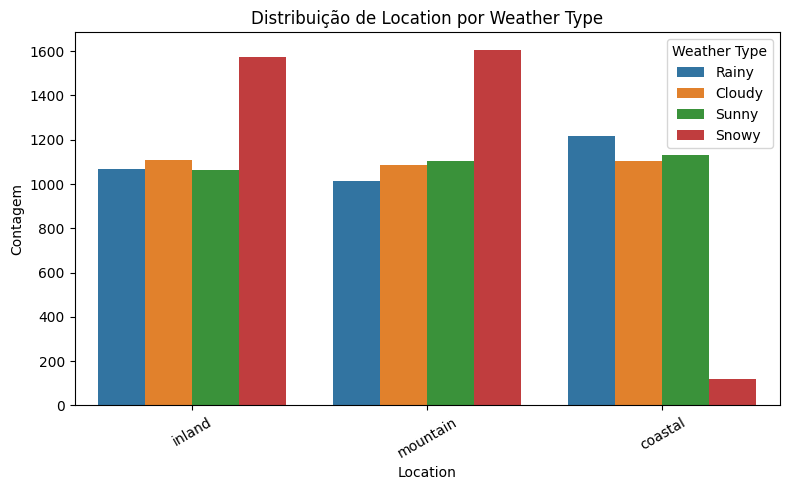

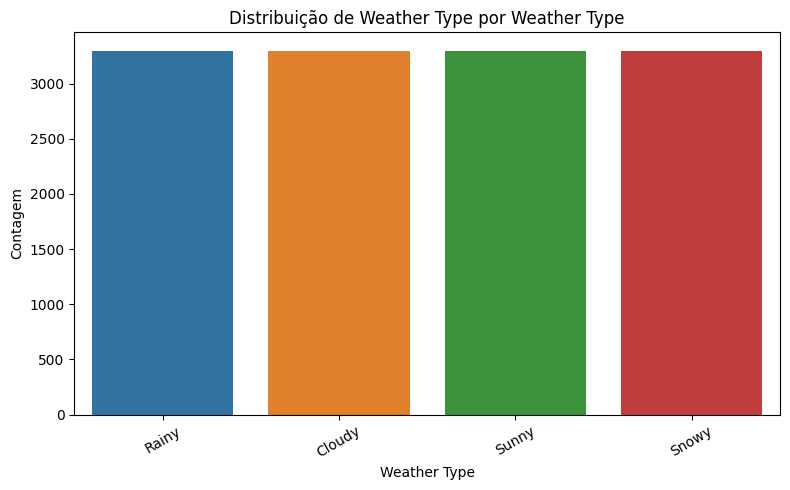

In [30]:
# Relação entre variáveis categóricas e a variável alvo (Weather Type)

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='Weather Type', data=dataset)
    plt.title(f'Distribuição de {col} por Weather Type')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()

Esses resultados trouxeram várias informações esperadas, algumas delas:
- Período de neve predominante no inverno
- Taxa de UV maior no verão
- Visibilidade melhor em dias limpos
- Precipitação em periodo chuvoso

## Treinamento

### Dataset

Agora vamos separar nossos dados para treinamento. Vamos trabalhar com duas divisões para vermos como será o comportamento com split 70-30 e 50-50.

In [31]:


# Separar features e target
X = dataset.drop(columns=['Weather Type'])
y = dataset['Weather Type']

# Split 70% treino, 30% teste
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split 50% treino, 50% teste
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print(f"70/30: Treino={X_train_70.shape[0]}, Teste={X_test_30.shape[0]}")
print(f"50/50: Treino={X_train_50.shape[0]}, Teste={X_test_50.shape[0]}")

70/30: Treino=9240, Teste=3960
50/50: Treino=6600, Teste=6600


### Random Forest
Como funciona:

- Gera diversas árvores com amostras aleatórias dos dados.

- Faz uma votação majoritária entre as árvores.



In [ ]:
# Codificar variáveis categóricas para o modelo
X_encoded = pd.get_dummies(X, drop_first=True)

# Ajustar splits codificados
X_train_70_enc = X_encoded.loc[X_train_70.index]
X_test_30_enc = X_encoded.loc[X_test_30.index]
X_train_50_enc = X_encoded.loc[X_train_50.index]
X_test_50_enc = X_encoded.loc[X_test_50.index]

# Treinamento Random Forest para split 70/30
rf_70 = RandomForestClassifier(random_state=42)
rf_70.fit(X_train_70_enc, y_train_70)
y_pred_70 = rf_70.predict(X_test_30_enc)

# Treinamento Random Forest para split 50/50
rf_50 = RandomForestClassifier(random_state=42)
rf_50.fit(X_train_50_enc, y_train_50)
y_pred_50 = rf_50.predict(X_test_50_enc)


rf_accuracy_score70 = accuracy_score(y_test_30, y_pred_70)
rf_confusion_matrix70 = confusion_matrix(y_test_30, y_pred_70)
rf_classification_report70 = classification_report(y_test_30, y_pred_70)

rf_accuracy_score50 = accuracy_score(y_test_50, y_pred_50)
rf_confusion_matrix50 = confusion_matrix(y_test_50, y_pred_50)
rf_classification_report50 = classification_report(y_test_50, y_pred_50)


print("Resultados Random Forest (Split 70/30):")
print("Acurácia:", rf_accuracy_score70)
print("Matriz de Confusão:\n", rf_confusion_matrix70)
print("Relatório de Classificação:\n", rf_classification_report70)

print("\nResultados Random Forest (Split 50/50):")
print("Acurácia:", rf_accuracy_score50)
print("Matriz de Confusão:\n", rf_confusion_matrix50)
print("Relatório de Classificação:\n", rf_classification_report50)


Resultados Random Forest (Split 70/30):
Acurácia: 0.9111111111111111
Matriz de Confusão:
 [[905  54   9  22]
 [ 54 902  11  23]
 [ 41  23 901  25]
 [ 51  28  11 900]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.86      0.91      0.89       990
       Rainy       0.90      0.91      0.90       990
       Snowy       0.97      0.91      0.94       990
       Sunny       0.93      0.91      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960


Resultados Random Forest (Split 50/50):
Acurácia: 0.916969696969697
Matriz de Confusão:
 [[1500   88   20   42]
 [  86 1512   19   33]
 [  62   37 1513   38]
 [  68   35   20 1527]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.87      0.91      0.89      1650
       Rainy       0.90      0.92      0.91     


Variáveis mais importantes na classificação (Split 70/30):
Temperature                  0.190730
Precipitation (%)            0.149707
Visibility (km)              0.139423
Atmospheric Pressure         0.137809
UV Index                     0.130010
Humidity                     0.070785
Season_Winter                0.051007
Wind Speed                   0.042810
Cloud Cover_overcast         0.039777
Cloud Cover_partly cloudy    0.016257
dtype: float64


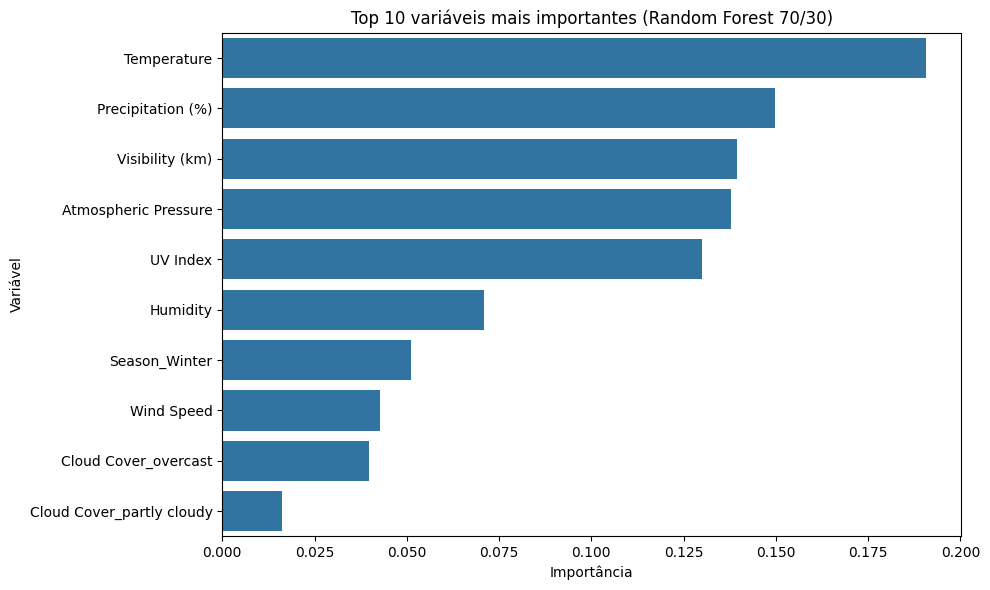

In [45]:
# Importância das variáveis no modelo Random Forest (split 70/30)
importances = pd.Series(rf_70.feature_importances_, index=X_train_70_enc.columns)
importances_sorted = importances.sort_values(ascending=False)
print("\nVariáveis mais importantes na classificação (Split 70/30):")
print(importances_sorted.head(10))

# Opcional: plotar as 10 variáveis mais importantes
plt.figure(figsize=(10, 6))
sns.barplot(x=importances_sorted.head(10), y=importances_sorted.head(10).index)
plt.title('Top 10 variáveis mais importantes (Random Forest 70/30)')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

Com a Random Forest conseguimos ver a importancia de cada variável na classificação. A imagem acima apresenta de forma ordenada a relevância de cada uma.

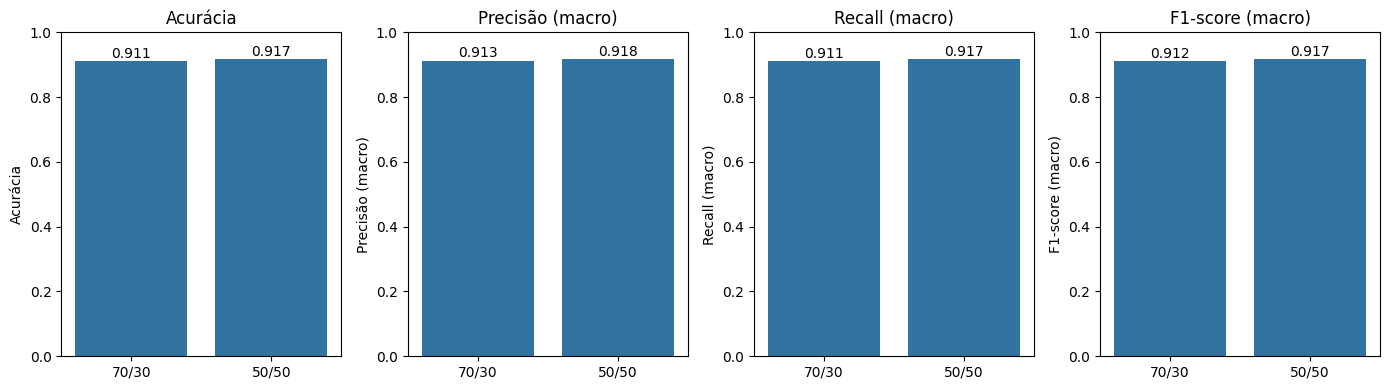

In [33]:
# Calcular métricas para cada split
metrics = {
    'Acurácia': [
        accuracy_score(y_test_30, y_pred_70),
        accuracy_score(y_test_50, y_pred_50)
    ],
    'Precisão (macro)': [
        precision_score(y_test_30, y_pred_70, average='macro'),
        precision_score(y_test_50, y_pred_50, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test_30, y_pred_70, average='macro'),
        recall_score(y_test_50, y_pred_50, average='macro')
    ],
    'F1-score (macro)': [
        f1_score(y_test_30, y_pred_70, average='macro'),
        f1_score(y_test_50, y_pred_50, average='macro')
    ]
}

splits = ['70/30', '50/50']

plt.figure(figsize=(14, 4))
for i, (metric, values) in enumerate(metrics.items(), 1):
    plt.subplot(1, 4, i)
    sns.barplot(x=splits, y=values)
    plt.ylim(0, 1)
    plt.ylabel(metric)
    plt.title(metric)
    for j, v in enumerate(values):
        plt.text(j, v + 0.01, f"{v:.3f}", ha='center')
plt.tight_layout()
plt.show()

### Support Vector Classifier
Como funciona:

- Encontra um hiperplano ótimo que separa as classes.

- Pode usar kernels para lidar com dados não linearmente separáveis.

In [ ]:
# SVM - 70/30
svm_70 = SVC(random_state=42)
svm_70.fit(X_train_70_enc, y_train_70)
y_pred_svm_70 = svm_70.predict(X_test_30_enc)

# SVM - 50/50
svm_50 = SVC(random_state=42)
svm_50.fit(X_train_50_enc, y_train_50)
y_pred_svm_50 = svm_50.predict(X_test_50_enc)




svm_accuracy_score70 = accuracy_score(y_test_30, y_pred_svm_70)
svm_confusion_matrix70 = confusion_matrix(y_test_30, y_pred_svm_70)
svm_classification_report70 = classification_report(y_test_30, y_pred_svm_70)

svm_accuracy_score50 = accuracy_score(y_test_50, y_pred_svm_50)
svm_confusion_matrix50 = confusion_matrix(y_test_50, y_pred_svm_50)
svm_classification_report50 = classification_report(y_test_50, y_pred_svm_50)



# Resultados SVM 70/30
print("Resultados SVM (Split 70/30):")
print("Acurácia:", svm_accuracy_score70)
print("Matriz de Confusão:\n", svm_confusion_matrix70)
print("Relatório de Classificação:\n", svm_classification_report70)

# Resultados SVM 50/50
print("\nResultados SVM (Split 50/50):")
print("Acurácia:", svm_accuracy_score50)
print("Matriz de Confusão:\n", svm_confusion_matrix50)
print("Relatório de Classificação:\n", svm_classification_report50)

Resultados SVM (Split 70/30):
Acurácia: 0.8287878787878787
Matriz de Confusão:
 [[754 146  34  56]
 [ 55 859  63  13]
 [ 21  20 941   8]
 [ 51 160  51 728]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.86      0.76      0.81       990
       Rainy       0.72      0.87      0.79       990
       Snowy       0.86      0.95      0.91       990
       Sunny       0.90      0.74      0.81       990

    accuracy                           0.83      3960
   macro avg       0.84      0.83      0.83      3960
weighted avg       0.84      0.83      0.83      3960


Resultados SVM (Split 50/50):
Acurácia: 0.8224242424242424
Matriz de Confusão:
 [[1230  266   54  100]
 [ 100 1407  121   22]
 [  35   32 1563   20]
 [  79  264   79 1228]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.85      0.75      0.80      1650
       Rainy       0.71      0.85      0.78      1650
       Snowy 

### Gradient Boosting

Como funciona:

- Treina modelos fracos sequencialmente, cada um corrigindo os erros do anterior.

- Muito preciso, porém mais sensível a overfitting que o Random Forest.

In [37]:
# Treinamento Gradient Boosting para split 70/30
gb_70 = GradientBoostingClassifier(random_state=42)
gb_70.fit(X_train_70_enc, y_train_70)
y_pred_gb_70 = gb_70.predict(X_test_30_enc)

# Treinamento Gradient Boosting para split 50/50
gb_50 = GradientBoostingClassifier(random_state=42)
gb_50.fit(X_train_50_enc, y_train_50)
y_pred_gb_50 = gb_50.predict(X_test_50_enc)



gb_accuracy_score70 = accuracy_score(y_test_30, y_pred_gb_70)
gb_confusion_matrix70 = confusion_matrix(y_test_30, y_pred_gb_70)
gb_classification_report70 = classification_report(y_test_30, y_pred_gb_70)

gb_accuracy_score50 = accuracy_score(y_test_50, y_pred_gb_50)
gb_confusion_matrix50 = confusion_matrix(y_test_50, y_pred_gb_50)
gb_classification_report50 = classification_report(y_test_50, y_pred_gb_50)


print("Resultados Gradient Boosting (Split 70/30):")
print("Acurácia:", gb_accuracy_score70)
print("Matriz de Confusão:\n", gb_confusion_matrix70)
print("Relatório de Classificação:\n", gb_classification_report70)

print("\nResultados Gradient Boosting (Split 50/50):")
print("Acurácia:", gb_accuracy_score50)
print("Matriz de Confusão:\n", gb_confusion_matrix50)
print("Relatório de Classificação:\n", gb_classification_report50)

Resultados Gradient Boosting (Split 70/30):
Acurácia: 0.9141414141414141
Matriz de Confusão:
 [[900  49  17  24]
 [ 40 903  22  25]
 [ 30  23 908  29]
 [ 43  22  16 909]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.89      0.91      0.90       990
       Rainy       0.91      0.91      0.91       990
       Snowy       0.94      0.92      0.93       990
       Sunny       0.92      0.92      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960


Resultados Gradient Boosting (Split 50/50):
Acurácia: 0.9163636363636364
Matriz de Confusão:
 [[1473   96   32   49]
 [  63 1516   26   45]
 [  46   34 1531   39]
 [  66   35   21 1528]]
Relatório de Classificação:
               precision    recall  f1-score   support

      Cloudy       0.89      0.89      0.89      1650
       Rainy       0.90      0.92      

In [ ]:
# Comparação dos resultados dos modelos Random Forest e SVM para os dois splits

model_names = ['Random Forest', 'SVM', 'Gradient Boosting']
splits = ['70/30', '50/50']

# Coletar acurácias e outras métricas
accuracies = [
    [
        accuracy_score(y_test_30, y_pred_70), 
        accuracy_score(y_test_50, y_pred_50)
    ],
    [
        accuracy_score(y_test_30, y_pred_svm_70), 
        accuracy_score(y_test_50, y_pred_svm_50)
    ],
    [
        accuracy_score(y_test_30, y_pred_gb_70), 
        accuracy_score(y_test_50, y_pred_gb_50)
    ]
]

precisions = [
    [
        precision_score(y_test_30, y_pred_70, average='macro'),
        precision_score(y_test_50, y_pred_50, average='macro')
    ],
    [
        precision_score(y_test_30, y_pred_svm_70, average='macro'),
        precision_score(y_test_50, y_pred_svm_50, average='macro')
    ],
    [
        precision_score(y_test_30, y_pred_gb_70, average='macro'),
        precision_score(y_test_50, y_pred_gb_50, average='macro')
    ]
]

recalls = [
    [
        recall_score(y_test_30, y_pred_70, average='macro'),
        recall_score(y_test_50, y_pred_50, average='macro')
    ],
    [
        recall_score(y_test_30, y_pred_svm_70, average='macro'),
        recall_score(y_test_50, y_pred_svm_50, average='macro')
    ],
    [
        recall_score(y_test_30, y_pred_gb_70, average='macro'),
        recall_score(y_test_50, y_pred_gb_50, average='macro')
    ]
]
f1s = [
    [
        f1_score(y_test_30, y_pred_70, average='macro'),
        f1_score(y_test_50, y_pred_50, average='macro')
    ],
    [
        f1_score(y_test_30, y_pred_svm_70, average='macro'),
        f1_score(y_test_50, y_pred_svm_50, average='macro')
    ],
    [
        f1_score(y_test_30, y_pred_gb_70, average='macro'),
        f1_score(y_test_50, y_pred_gb_50, average='macro')
    ]
]

In [43]:
def plot_metric_comparison(metric_values, metric_name, model_names, splits, width=0.30):
    """
    Plota a comparação de uma métrica entre diferentes modelos e splits.

    Parâmetros:
        metric_values: lista de listas, cada sublista contém os valores da métrica para cada split de um modelo.
        metric_name: nome da métrica (str) para título e eixo y.
        model_names: lista com os nomes dos modelos.
        splits: lista com os nomes dos splits (ex: ['70/30', '50/50']).
        width: largura das barras.
    """
    x = np.arange(len(splits))
    plt.figure(figsize=(8, 6))
    for i, (model, values) in enumerate(zip(model_names, metric_values)):
        plt.bar(x + (i - len(model_names)/2)*width + width/2, values, width, label=model)
        for j, v in enumerate(values):
            plt.text(x[j] + (i - len(model_names)/2)*width + width/2, v + 0.01, f"{v:.3f}", ha='center')
    plt.xticks(x, splits)
    plt.ylim(0, 1)
    plt.ylabel(metric_name)
    plt.title(f'Comparação de {metric_name}: ' + ' vs '.join(model_names))
    plt.legend()
    plt.tight_layout()
    plt.show()

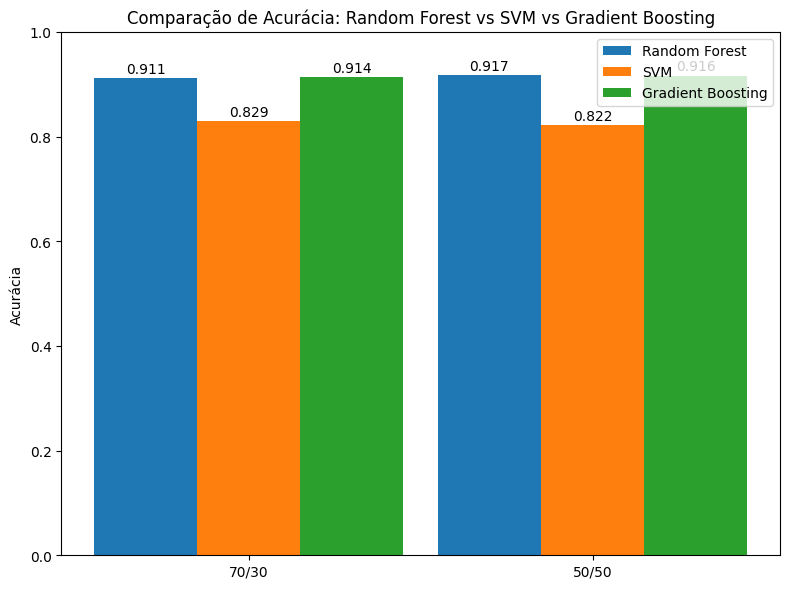

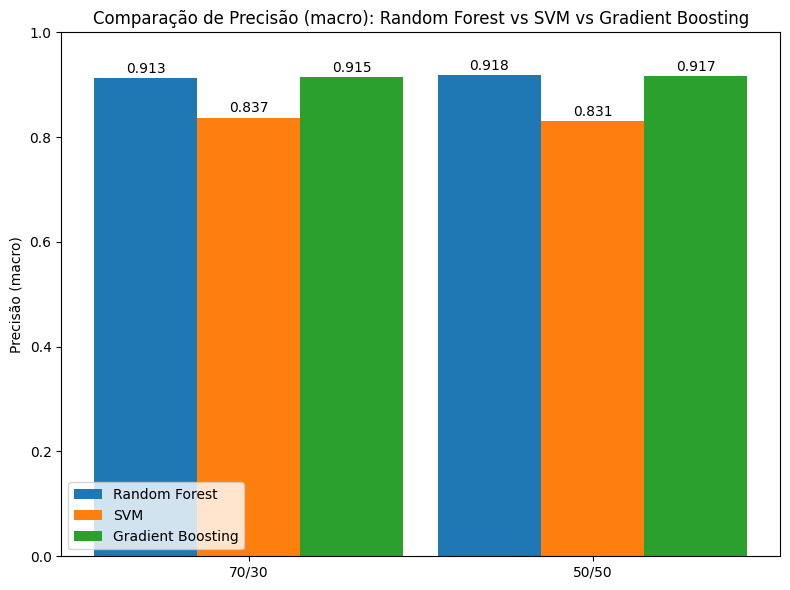

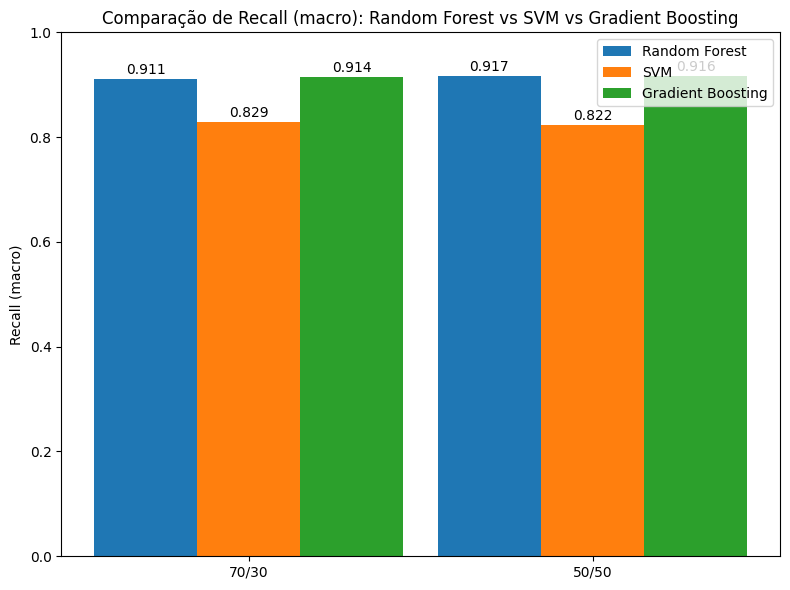

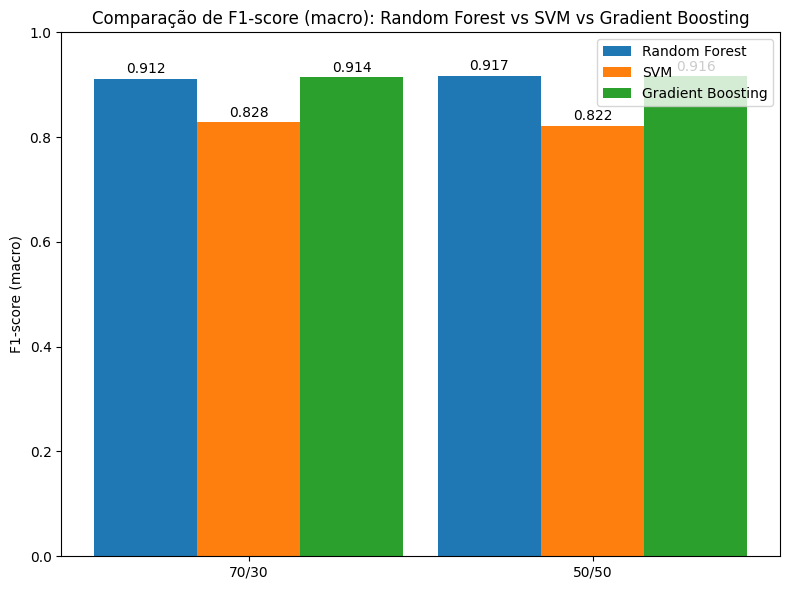

In [44]:
#Agora vamos plotar as comparações para cada métrica
plot_metric_comparison(accuracies, 'Acurácia', model_names, splits)
plot_metric_comparison(precisions, 'Precisão (macro)', model_names, splits)
plot_metric_comparison(recalls, 'Recall (macro)', model_names, splits)
plot_metric_comparison(f1s, 'F1-score (macro)', model_names, splits)

Os gráficos acima permitem comparar o desempenho dos modelos Random Forest, SVM e Gradient Boosting nos dois cenários de divisão dos dados (70/30 e 50/50). Observa-se que todos os modelos apresentam métricas elevadas e próximas entre si, indicando que o dataset está bem balanceado e os algoritmos conseguem capturar padrões relevantes para a classificação. Pequenas variações entre as métricas sugerem que o aumento da quantidade de dados de treino não impactou significativamente o desempenho, reforçando a robustez do pré-processamento realizado.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Codificar y para valores inteiros e depois para one-hot
le = LabelEncoder()
y_train_70_int = le.fit_transform(y_train_70)
y_test_30_int = le.transform(y_test_30)
y_train_70_cat = to_categorical(y_train_70_int)
y_test_30_cat = to_categorical(y_test_30_int)

# Definir o modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_70_enc.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train_70_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train_70_enc, y_train_70_cat, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Avaliar no teste
loss, acc = model.evaluate(X_test_30_enc, y_test_30_cat, verbose=0)
print(f"Acurácia no teste (Keras, split 70/30): {acc:.4f}")

2025-07-06 17:40:13.507253: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-06 17:40:13.512917: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751834413.518654  208752 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751834413.520303  208752 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751834413.525007  208752 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Epoch 1/100


/home/carlos/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1751834414.303984  208752 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.4184 - loss: 25.0637 - val_accuracy: 0.7890 - val_loss: 0.8691
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.7526 - loss: 0.7962 - val_accuracy: 0.8214 - val_loss: 0.6866
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7874 - loss: 0.6713 - val_accuracy: 0.7484 - val_loss: 0.7307
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.7952 - loss: 0.6672 - val_accuracy: 0.8025 - val_loss: 0.7213
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.7421 - loss: 0.8374 - val_accuracy: 0.6006 - val_loss: 1.2901
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7636 - loss: 0.7759 - val_accuracy: 0.8236 - val_loss: 0.5965
Epoch 7/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.7933 - loss: 0.6942 - val_accuracy: 0.8506 - val_loss: 0.5513
Epoch 8/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - accuracy: 0.8189 - loss: 0.6214 - val

# Conclusão

Neste trabalho, realizamos uma análise detalhada do dataset sintético de classificação de tipos de clima, abordando desde a exploração inicial dos dados até a aplicação de diferentes modelos de machine learning. O processo envolveu:

- **Análise Exploratória:** Identificamos outliers e inconsistências em variáveis numéricas, como temperatura, umidade, precipitação e pressão atmosférica, além de compreender a distribuição das variáveis categóricas.
- **Pré-processamento:** Corrigimos valores fora dos limites reais utilizando técnicas de regressão e removemos ruídos, tornando o dataset mais adequado para modelagem.
- **Modelagem:** Aplicamos Random Forest, SVM e Gradient Boosting, avaliando o desempenho em diferentes divisões de treino e teste (70/30 e 50/50). Os modelos apresentaram boas métricas de acurácia, precisão, recall e f1-score, com destaque para o Random Forest em termos de interpretabilidade das variáveis mais importantes.
- **Comparação de Modelos:** Observamos que todos os modelos tiveram desempenho semelhante, com pequenas variações entre os splits, mostrando que o dataset está balanceado e bem preparado para tarefas de classificação.
- **Rede Neural:** Também testamos uma abordagem com rede neural, que apresentou resultados competitivos, reforçando a robustez do pré-processamento realizado, mesmo que com poucos dados.

A análise dos resultados mostrou que o dataset sintético, apesar de suas limitações, é capaz de fornecer insights valiosos sobre a classificação de tipos de clima. A identificação e tratamento de outliers foram cruciais para melhorar a qualidade dos dados e, consequentemente, o desempenho dos modelos. A Random Forest se destacou pela sua capacidade de interpretar a importância das variáveis, enquanto SVM e Gradient Boosting mostraram-se eficazes em capturar padrões complexos nos dados.

A análise exploratória inicial revelou padrões esperados, como a predominância de neve no inverno e maior taxa de UV no verão, corroborando a consistência dos dados. A visualização da importância das variáveis na Random Forest também forneceu insights valiosos sobre quais fatores mais influenciam a classificação dos tipos de clima.

Em resumo, o trabalho demonstrou a eficácia de técnicas de machine learning na classificação de tipos de clima, destacando a importância do pré-processamento e da análise exploratória para garantir resultados confiáveis e interpretáveis. A combinação de diferentes modelos e a análise de suas métricas permitiram uma compreensão mais profunda do dataset e das relações entre as variáveis envolvidas.

De modo geral, o trabalho demonstrou a importância de uma análise criteriosa dos dados e do tratamento de outliers para garantir resultados confiáveis em tarefas de classificação. Além disso, a comparação entre diferentes algoritmos permitiu identificar pontos fortes e limitações de cada abordagem, contribuindo para uma visão mais ampla sobre o problema de classificação de tipos de clima.